In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente3/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

28684

In [6]:
with open('dataset/generado/paciente3/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

28684

In [8]:
with open('dataset/generado/paciente3/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

3585

In [10]:
with open('dataset/generado/paciente3/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

3585

In [12]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

3586

In [14]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

3586

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/vanilla_dropout.h5')

Epoch 1/50
897/897 [==============================] - 47s 37ms/step - loss: 0.0113 - mae: 0.0795 - mse: 0.0113 - val_loss: 0.0033 - val_mae: 0.0452 - val_mse: 0.0033
Epoch 2/50
897/897 [==============================] - 29s 33ms/step - loss: 0.0050 - mae: 0.0538 - mse: 0.0050 - val_loss: 0.0029 - val_mae: 0.0436 - val_mse: 0.0029
Epoch 3/50
897/897 [==============================] - 30s 34ms/step - loss: 0.0034 - mae: 0.0442 - mse: 0.0034 - val_loss: 0.0026 - val_mae: 0.0405 - val_mse: 0.0026
Epoch 4/50
897/897 [==============================] - 33s 37ms/step - loss: 0.0028 - mae: 0.0400 - mse: 0.0028 - val_loss: 0.0024 - val_mae: 0.0390 - val_mse: 0.0024
Epoch 5/50
897/897 [==============================] - 35s 39ms/step - loss: 0.0025 - mae: 0.0381 - mse: 0.0025 - val_loss: 0.0021 - val_mae: 0.0359 - val_mse: 0.0021
Epoch 6/50
897/897 [==============================] - 34s 38ms/step - loss: 0.0023 - mae: 0.0360 - mse: 0.0023 - val_loss: 0.0012 - val_mae: 0.0282 - val_mse: 0.0012
Epoc

113/113 [==============================] - 3s 20ms/step - loss: 0.0012 - mae: 0.0266 - mse: 0.0012
test loss, test acc: [0.0011963500874117017, 0.026629554107785225, 0.0011963500874117017]


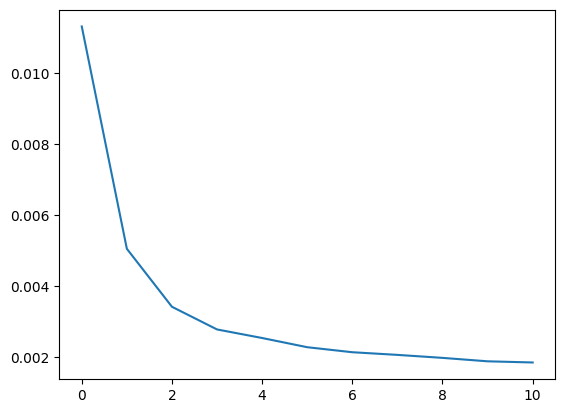

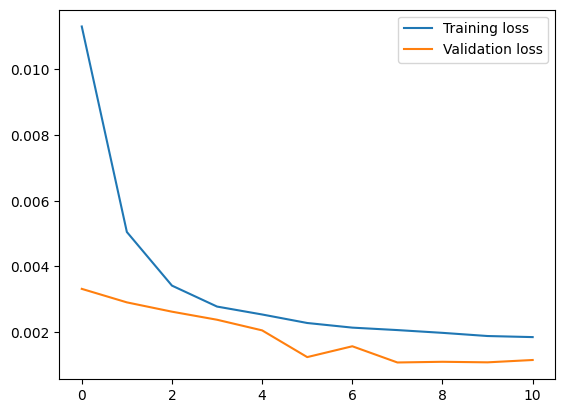

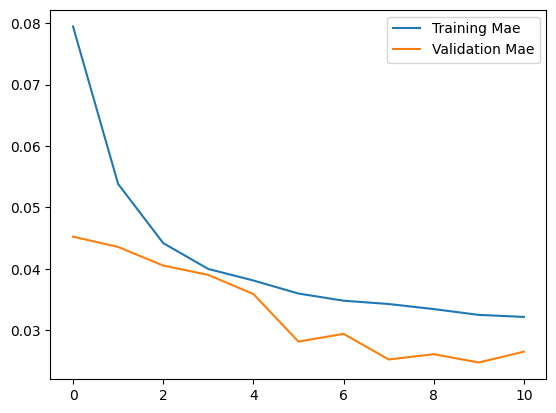

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 5s 19ms/step


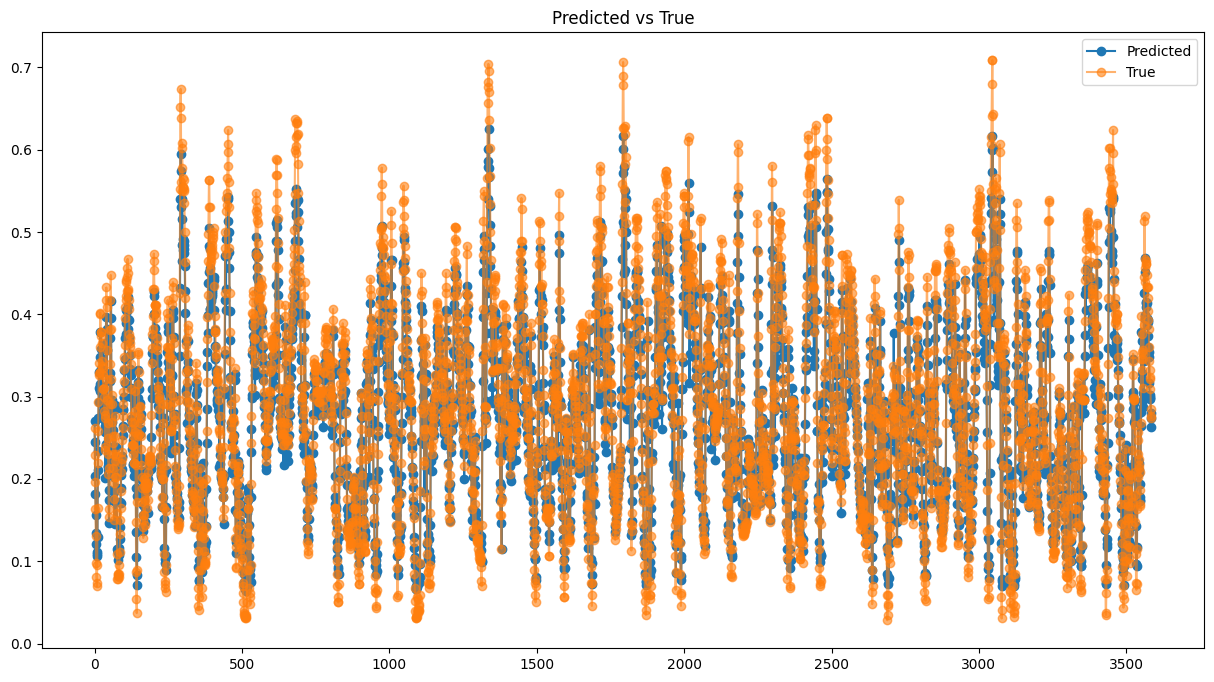

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02662955131008864,
 'mse': 0.03458828887862752,
 'rmse': 0.0011963497275513883}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/vanilla_NO_dropout.h5')

Epoch 1/50
897/897 [==============================] - 42s 34ms/step - loss: 0.0092 - mae: 0.0650 - mse: 0.0092 - val_loss: 0.0019 - val_mae: 0.0313 - val_mse: 0.0019
Epoch 2/50
897/897 [==============================] - 33s 36ms/step - loss: 0.0020 - mae: 0.0325 - mse: 0.0020 - val_loss: 0.0013 - val_mae: 0.0295 - val_mse: 0.0013
Epoch 3/50
897/897 [==============================] - 33s 37ms/step - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - val_loss: 9.7547e-04 - val_mae: 0.0256 - val_mse: 9.7547e-04
Epoch 4/50
897/897 [==============================] - 35s 39ms/step - loss: 8.8196e-04 - mae: 0.0216 - mse: 8.8196e-04 - val_loss: 5.4934e-04 - val_mae: 0.0172 - val_mse: 5.4934e-04
Epoch 5/50
897/897 [==============================] - 31s 35ms/step - loss: 7.5254e-04 - mae: 0.0200 - mse: 7.5254e-04 - val_loss: 4.3907e-04 - val_mae: 0.0148 - val_mse: 4.3907e-04
Epoch 6/50
897/897 [==============================] - 30s 34ms/step - loss: 6.7643e-04 - mae: 0.0188 - mse: 6.7643e-04 - val_loss:

113/113 [==============================] - 2s 13ms/step - loss: 4.3505e-04 - mae: 0.0154 - mse: 4.3505e-04
test loss, test acc: [0.00043505110079422593, 0.015426898375153542, 0.00043505110079422593]


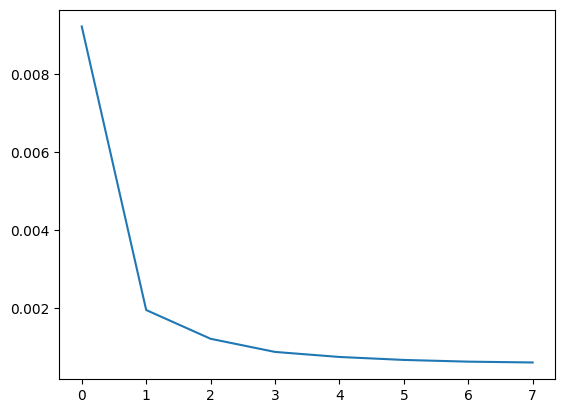

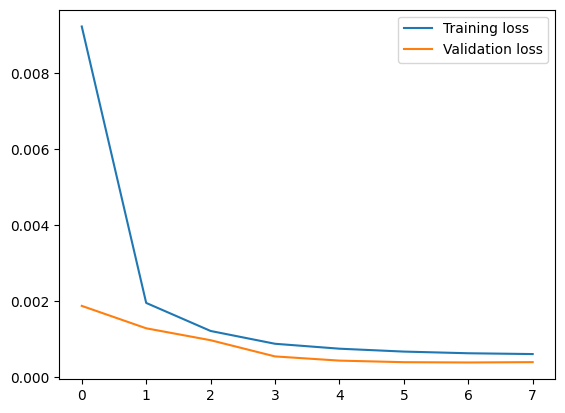

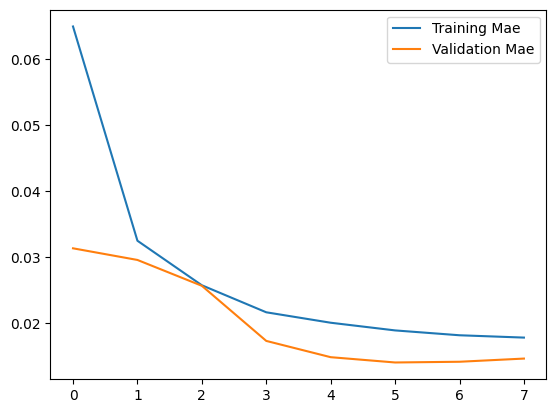

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 10ms/step


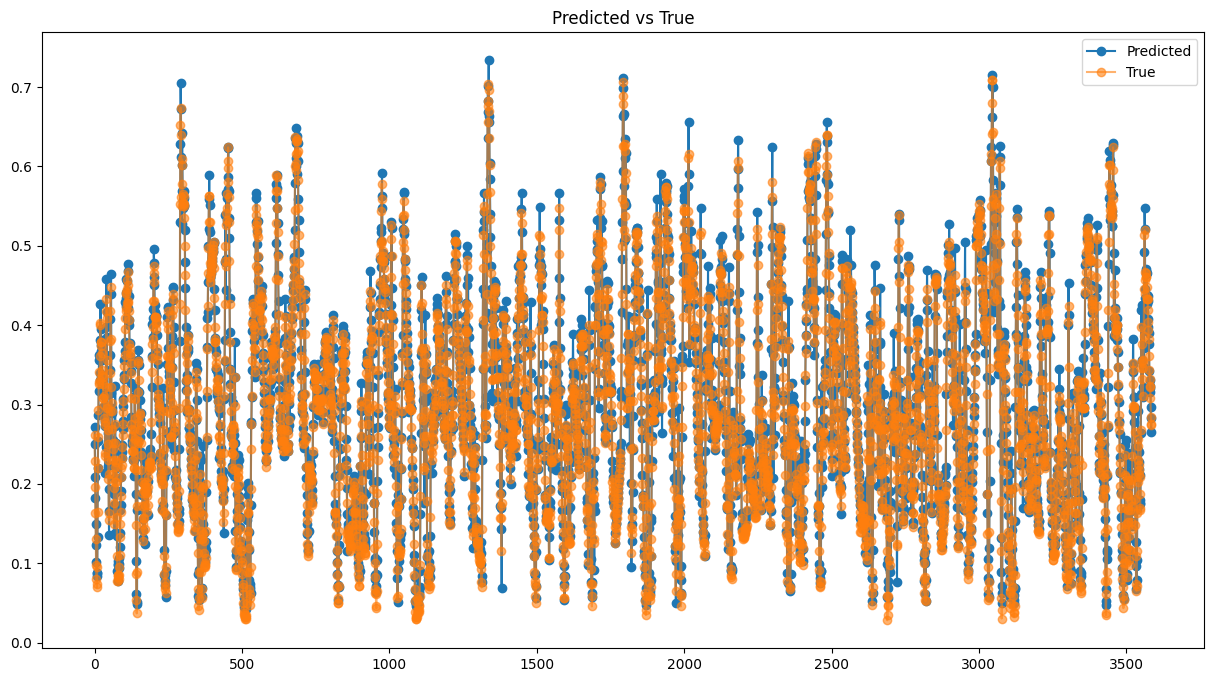

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.015426898737783922,
 'mse': 0.020857880504622808,
 'rmse': 0.00043505117914512424}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/stacked_dropout.h5')

Epoch 1/50
897/897 [==============================] - 60s 58ms/step - loss: 0.0172 - mae: 0.0972 - mse: 0.0172 - val_loss: 0.0043 - val_mae: 0.0520 - val_mse: 0.0043
Epoch 2/50
897/897 [==============================] - 52s 58ms/step - loss: 0.0063 - mae: 0.0603 - mse: 0.0063 - val_loss: 0.0021 - val_mae: 0.0354 - val_mse: 0.0021
Epoch 3/50
897/897 [==============================] - 31s 35ms/step - loss: 0.0035 - mae: 0.0448 - mse: 0.0035 - val_loss: 0.0014 - val_mae: 0.0291 - val_mse: 0.0014
Epoch 4/50
897/897 [==============================] - 19s 21ms/step - loss: 0.0025 - mae: 0.0373 - mse: 0.0025 - val_loss: 0.0014 - val_mae: 0.0300 - val_mse: 0.0014
Epoch 5/50
897/897 [==============================] - 17s 19ms/step - loss: 0.0021 - mae: 0.0341 - mse: 0.0021 - val_loss: 0.0012 - val_mae: 0.0265 - val_mse: 0.0012
Epoch 6/50
897/897 [==============================] - 17s 19ms/step - loss: 0.0019 - mae: 0.0331 - mse: 0.0019 - val_loss: 0.0013 - val_mae: 0.0288 - val_mse: 0.0013
Epoc

113/113 [==============================] - 1s 7ms/step - loss: 0.0017 - mae: 0.0341 - mse: 0.0017
test loss, test acc: [0.0016717935213819146, 0.034095004200935364, 0.0016717935213819146]


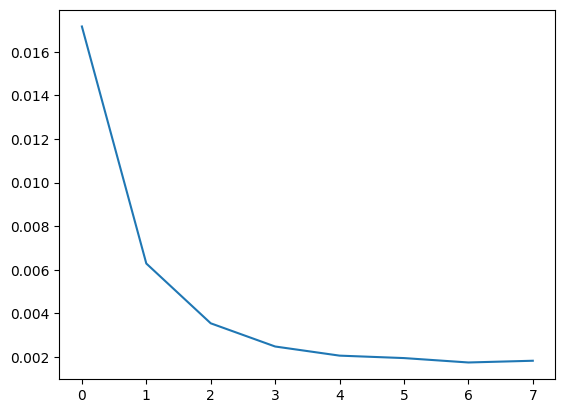

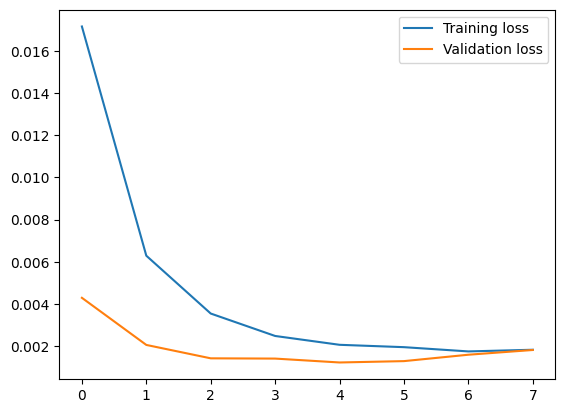

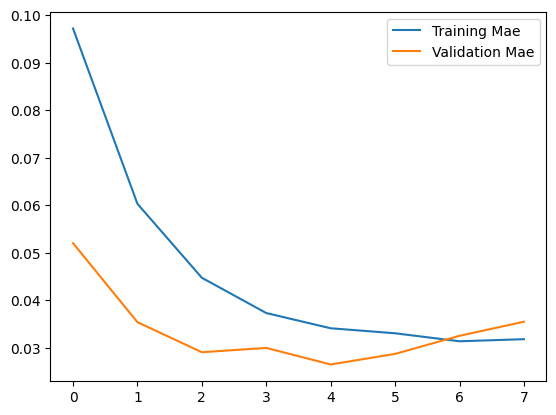

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 1s 7ms/step


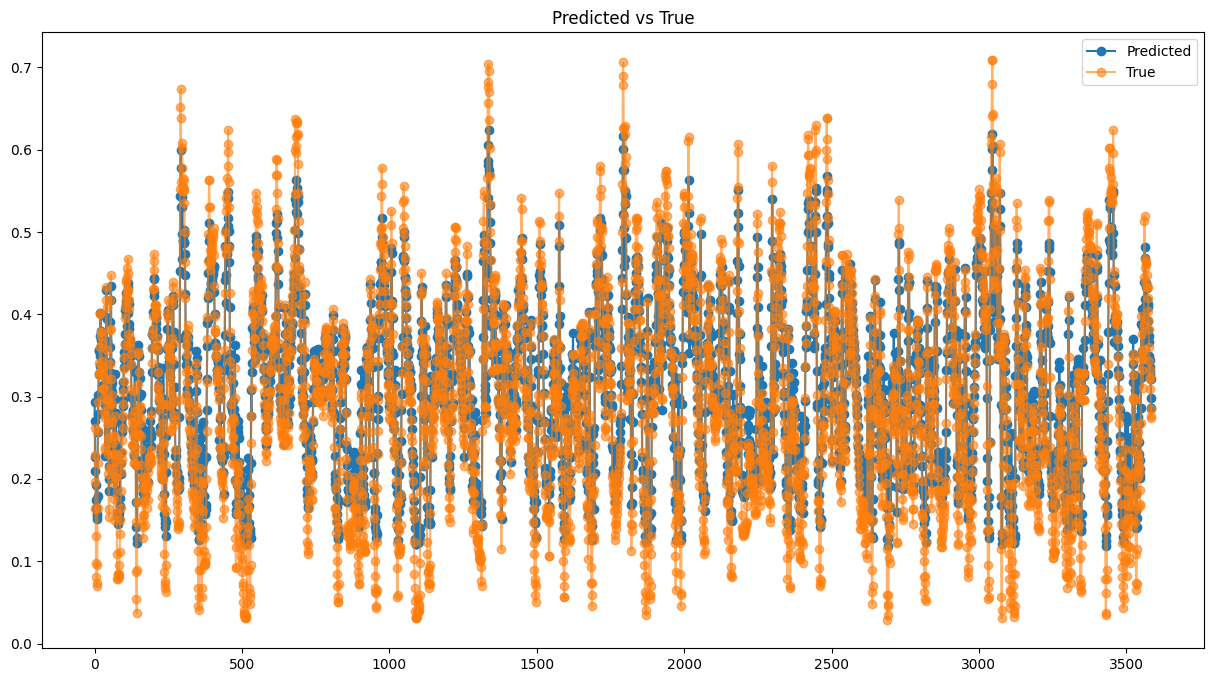

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03409500394098061,
 'mse': 0.040887573441248014,
 'rmse': 0.0016717936619134498}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/stacked_NO_dropout.h5')

Epoch 1/50
897/897 [==============================] - 20s 20ms/step - loss: 0.0116 - mae: 0.0775 - mse: 0.0116 - val_loss: 0.0022 - val_mae: 0.0358 - val_mse: 0.0022
Epoch 2/50
897/897 [==============================] - 18s 20ms/step - loss: 0.0022 - mae: 0.0350 - mse: 0.0022 - val_loss: 0.0014 - val_mae: 0.0298 - val_mse: 0.0014
Epoch 3/50
897/897 [==============================] - 18s 21ms/step - loss: 0.0011 - mae: 0.0244 - mse: 0.0011 - val_loss: 5.0302e-04 - val_mae: 0.0159 - val_mse: 5.0302e-04
Epoch 4/50
897/897 [==============================] - 18s 20ms/step - loss: 7.8834e-04 - mae: 0.0205 - mse: 7.8834e-04 - val_loss: 4.1308e-04 - val_mae: 0.0143 - val_mse: 4.1308e-04
Epoch 5/50
897/897 [==============================] - 18s 20ms/step - loss: 6.7989e-04 - mae: 0.0190 - mse: 6.7989e-04 - val_loss: 4.1911e-04 - val_mae: 0.0150 - val_mse: 4.1911e-04
Epoch 6/50
897/897 [==============================] - 18s 20ms/step - loss: 6.7652e-04 - mae: 0.0189 - mse: 6.7652e-04 - val_loss:

113/113 [==============================] - 1s 7ms/step - loss: 4.4285e-04 - mae: 0.0158 - mse: 4.4285e-04
test loss, test acc: [0.0004428463289514184, 0.01581554114818573, 0.0004428463289514184]


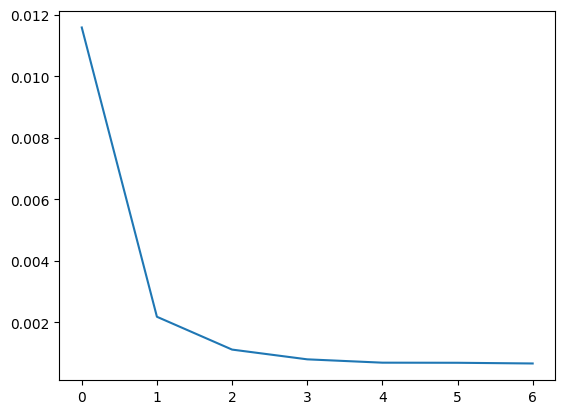

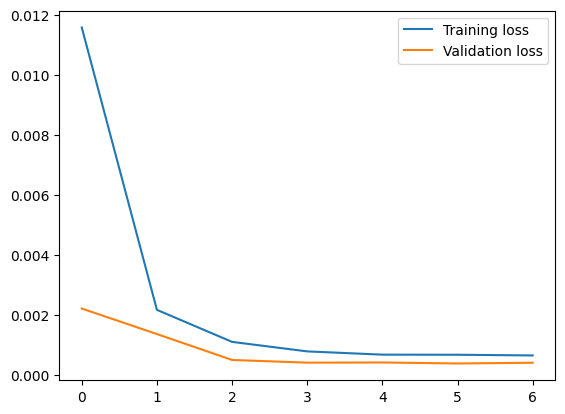

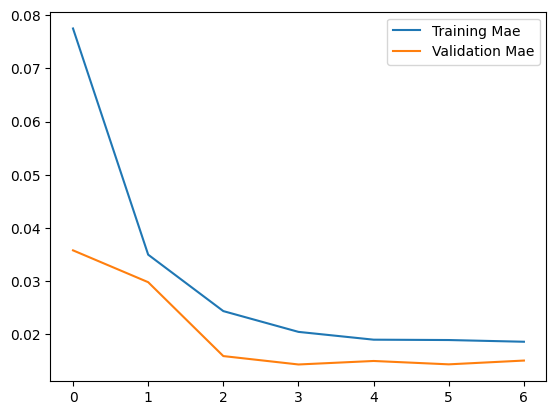

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 1s 7ms/step


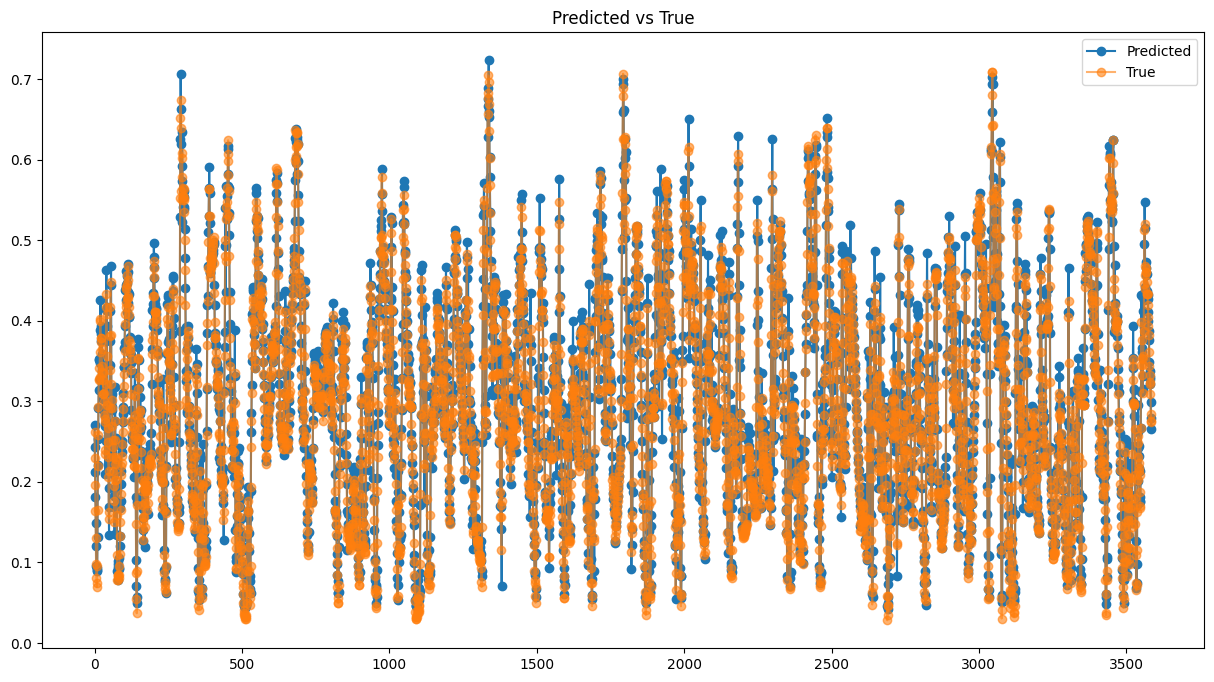

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01581554192742284,
 'mse': 0.021043915171391845,
 'rmse': 0.0004428463657407359}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/bidirectional_dropout.h5')

Epoch 1/50
897/897 [==============================] - 15s 14ms/step - loss: 0.0162 - mae: 0.0928 - mse: 0.0162 - val_loss: 0.0048 - val_mae: 0.0543 - val_mse: 0.0048
Epoch 2/50
897/897 [==============================] - 13s 14ms/step - loss: 0.0068 - mae: 0.0628 - mse: 0.0068 - val_loss: 0.0023 - val_mae: 0.0368 - val_mse: 0.0023
Epoch 3/50
897/897 [==============================] - 13s 14ms/step - loss: 0.0044 - mae: 0.0500 - mse: 0.0044 - val_loss: 0.0020 - val_mae: 0.0351 - val_mse: 0.0020
Epoch 4/50
897/897 [==============================] - 13s 14ms/step - loss: 0.0033 - mae: 0.0434 - mse: 0.0033 - val_loss: 0.0016 - val_mae: 0.0321 - val_mse: 0.0016
Epoch 5/50
897/897 [==============================] - 12s 14ms/step - loss: 0.0027 - mae: 0.0390 - mse: 0.0027 - val_loss: 0.0013 - val_mae: 0.0269 - val_mse: 0.0013
Epoch 6/50
897/897 [==============================] - 12s 14ms/step - loss: 0.0024 - mae: 0.0368 - mse: 0.0024 - val_loss: 0.0011 - val_mae: 0.0246 - val_mse: 0.0011
Epoc

113/113 [==============================] - 1s 5ms/step - loss: 0.0014 - mae: 0.0293 - mse: 0.0014
test loss, test acc: [0.001431079814210534, 0.029256226494908333, 0.001431079814210534]


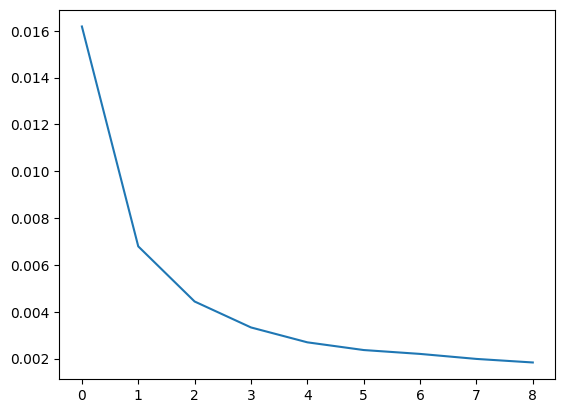

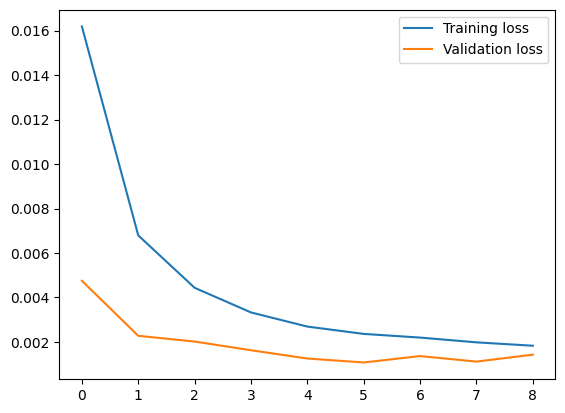

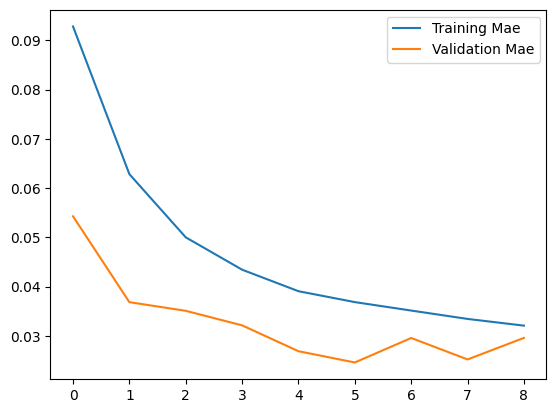

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 1s 4ms/step


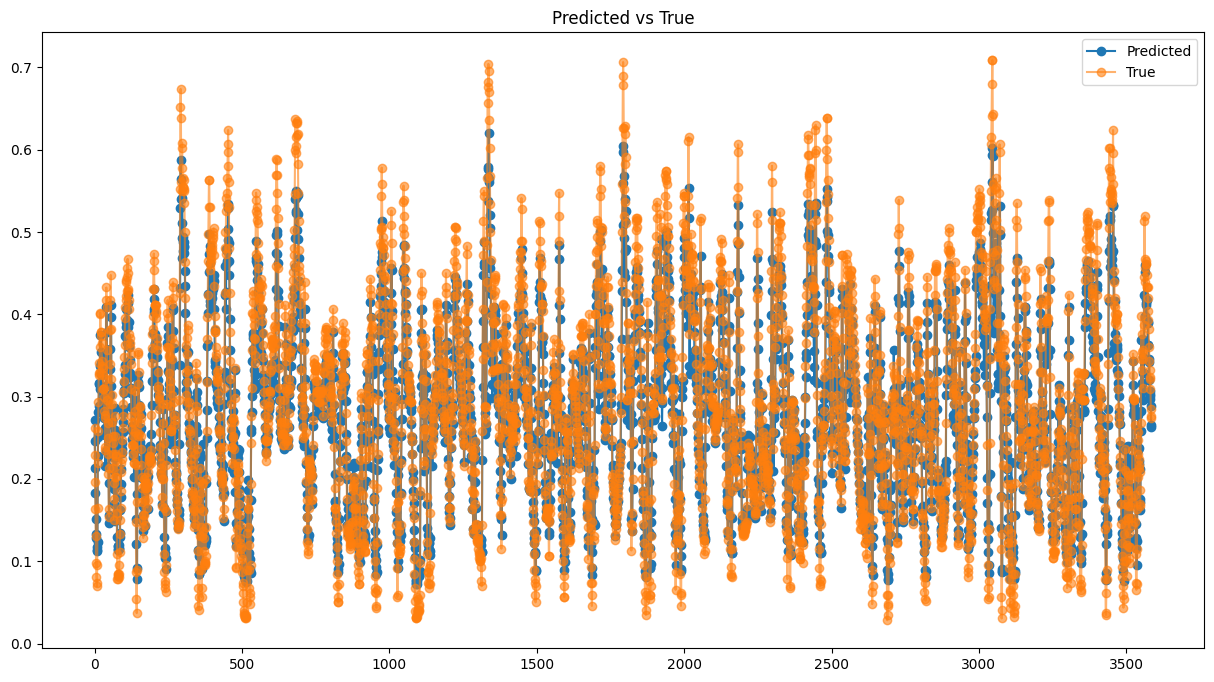

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029256231460461586,
 'mse': 0.03782961194899643,
 'rmse': 0.0014310795402116537}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/bidirectional_NO_dropout.h5')

Epoch 1/50
897/897 [==============================] - 15s 14ms/step - loss: 0.0104 - mae: 0.0700 - mse: 0.0104 - val_loss: 0.0024 - val_mae: 0.0371 - val_mse: 0.0024
Epoch 2/50
897/897 [==============================] - 12s 14ms/step - loss: 0.0025 - mae: 0.0371 - mse: 0.0025 - val_loss: 0.0020 - val_mae: 0.0383 - val_mse: 0.0020
Epoch 3/50
897/897 [==============================] - 12s 14ms/step - loss: 0.0016 - mae: 0.0298 - mse: 0.0016 - val_loss: 0.0014 - val_mae: 0.0321 - val_mse: 0.0014
Epoch 4/50
897/897 [==============================] - 13s 14ms/step - loss: 0.0011 - mae: 0.0241 - mse: 0.0011 - val_loss: 6.6533e-04 - val_mae: 0.0198 - val_mse: 6.6533e-04
Epoch 5/50
897/897 [==============================] - 13s 14ms/step - loss: 8.5136e-04 - mae: 0.0213 - mse: 8.5136e-04 - val_loss: 5.7260e-04 - val_mae: 0.0186 - val_mse: 5.7260e-04
Epoch 6/50
897/897 [==============================] - 13s 14ms/step - loss: 7.5461e-04 - mae: 0.0201 - mse: 7.5461e-04 - val_loss: 5.0204e-04 - va

113/113 [==============================] - 1s 5ms/step - loss: 5.4242e-04 - mae: 0.0187 - mse: 5.4242e-04
test loss, test acc: [0.0005424197297543287, 0.01865258626639843, 0.0005424197297543287]


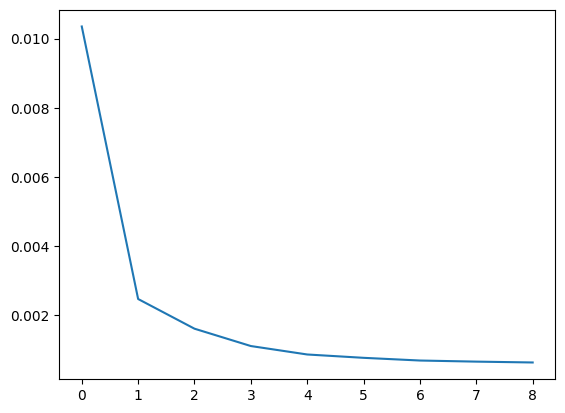

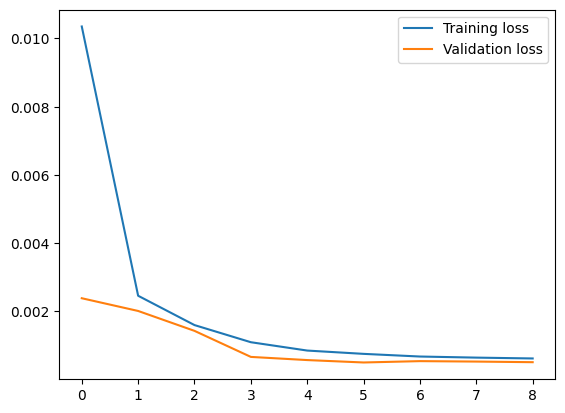

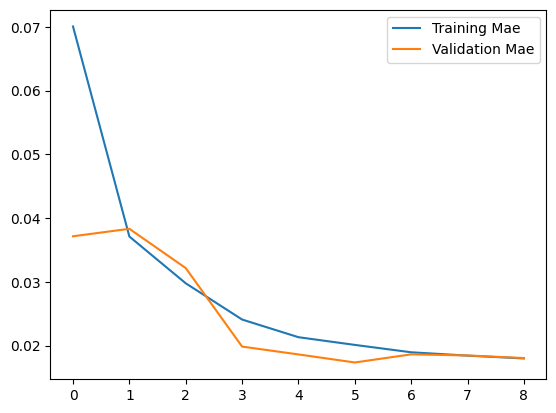

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 1s 5ms/step


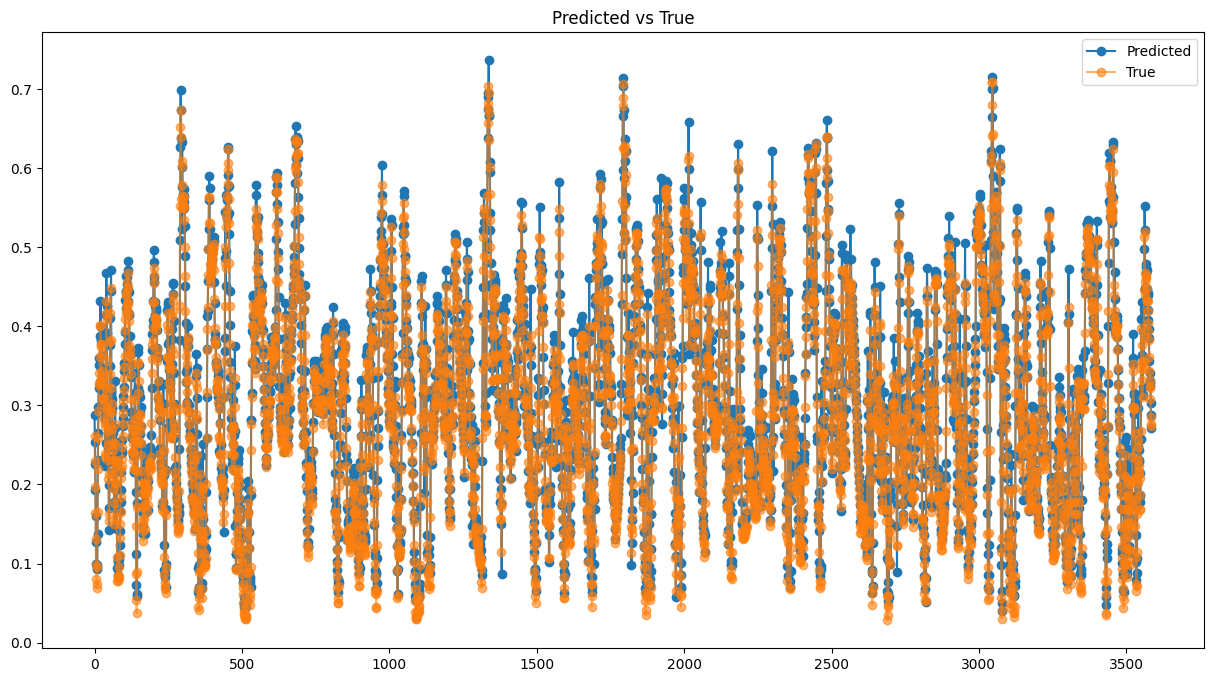

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01865259068666255,
 'mse': 0.02328990579691303,
 'rmse': 0.0005424197120290832}